In [49]:
import os
import pandas as pd
import numpy as np
import statsmodels.api as sm
import scipy.stats as scs
import matplotlib.pyplot as plt

In [50]:
def get_price(stock, path):
    result = {}
    for i in stock:
        data = pd.read_csv(path + '/' + i + '.csv')
        result[i] = data["Close"].values.tolist()
        result["Date"] = data["Date"].values.tolist()
    result = pd.DataFrame(result, index=result["Date"])
    return result
def get_stock(path):
    result = []
    for root,dir,files in os.walk(path):
        for file in files:
            if file.endswith('.csv'):
                result.append(file[:-4])
    return result

In [51]:
# Retrieve Stock Data and show some
path = r'Stock'

stock = get_stock(path) #['0066.HK', '0168.HK', '0857.HK']
data = get_price(stock, path)
data.pop("Date")
data.head()

,0003.HK,0857.HK,1398.HK,0941.HK,0066.HK,1093.HK,2319.HK,0914.HK,1928.HK,0168.HK,0386.HK,0753.HK,0270.HK,2202.HK,1929.HK,0151.HK,0700.HK,2318.HK,0175.HK,1128.HK
2015-01-02,11.0276,8.69,5.77,91.400002,31.900000,6.68,16.025000,29.299999,37.700001,52.450001,6.28,6.27,10.02,19.139999,10.64,10.04,112.800003,41.549999,2.44,21.049999
2015-01-05,10.9034,8.74,5.80,90.099998,31.799999,6.64,15.825000,29.100000,37.250000,50.849998,6.36,6.45,9.83,19.780001,10.84,9.97,113.500000,41.125000,2.59,21.200001
2015-01-06,10.7916,8.53,5.71,88.750000,31.500000,6.68,15.800000,28.700001,35.950001,51.799999,6.24,6.64,10.04,18.840000,10.74,9.98,120.000000,40.049999,2.63,20.299999
2015-01-07,10.8289,8.57,5.75,91.750000,31.700001,6.78,16.075001,28.450001,37.049999,52.049999,6.24,6.94,10.20,18.180000,10.76,10.00,124.400002,40.224998,2.66,20.900000
2015-01-08,11.0151,8.78,5.72,93.599998,32.250000,6.65,16.400000,28.900000,37.150002,53.349998,6.27,6.97,10.72,17.820000,11.00,10.06,127.300003,40.950001,2.72,21.400000


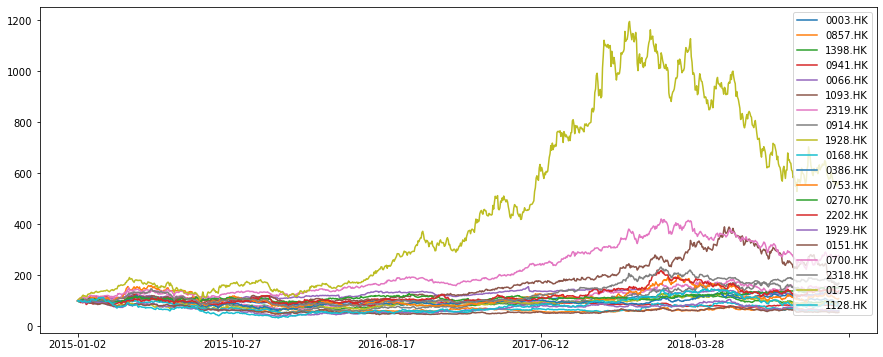

In [74]:
(data/data.iloc[0]*100).plot(figsize = (15,6))
plt.legend(loc="best")
plt.show()

In [53]:
#252 Transaction days, find annualized return
returns = np.log(data / data.shift(1))
returns.mean()*252

0003.HK    0.073939
0857.HK   -0.147476
1398.HK   -0.008100
0941.HK   -0.049353
0066.HK    0.065385
1093.HK    0.134354
2319.HK    0.107453
0914.HK    0.066450
1928.HK   -0.024156
0168.HK   -0.129502
0386.HK   -0.029747
0753.HK    0.021490
0270.HK    0.105492
2202.HK    0.084119
1929.HK   -0.124777
0151.HK   -0.154745
0700.HK    0.261655
2318.HK    0.130187
0175.HK    0.442833
1128.HK   -0.053414
dtype: float64

In [54]:
# The pandas built-in method was used to produce covariance matrix.
returns.cov()*252

,0003.HK,0857.HK,1398.HK,0941.HK,0066.HK,1093.HK,2319.HK,0914.HK,1928.HK,0168.HK,0386.HK,0753.HK,0270.HK,2202.HK,1929.HK,0151.HK,0700.HK,2318.HK,0175.HK,1128.HK
0003.HK,0.019415,0.017116,0.015154,0.012105,0.011385,0.009075,0.014628,0.016774,0.017709,0.011251,0.017308,0.014990,0.011602,0.014437,0.009793,0.012339,0.015309,0.014934,0.021279,0.020180
0857.HK,0.017116,0.089435,0.040225,0.029142,0.017801,0.032332,0.033477,0.047736,0.043038,0.030711,0.067765,0.035319,0.017727,0.041326,0.024592,0.026981,0.039834,0.044501,0.046670,0.045166
1398.HK,0.015154,0.040225,0.059317,0.025538,0.015556,0.028855,0.031927,0.045126,0.036131,0.028002,0.040032,0.044612,0.017627,0.044026,0.021275,0.022868,0.041999,0.048216,0.050272,0.040467
0941.HK,0.012105,0.029142,0.025538,0.047088,0.014122,0.019612,0.020039,0.028875,0.025802,0.018826,0.027177,0.025217,0.016303,0.025904,0.014818,0.019035,0.026451,0.029736,0.026162,0.026783
0066.HK,0.011385,0.017801,0.015556,0.014122,0.031273,0.012482,0.017253,0.018127,0.017559,0.011907,0.017559,0.020698,0.009956,0.015480,0.011219,0.011162,0.018673,0.016784,0.024358,0.020567
1093.HK,0.009075,0.032332,0.028855,0.019612,0.012482,0.133557,0.044666,0.041707,0.034523,0.041708,0.029584,0.042078,0.017136,0.038544,0.018856,0.026535,0.043803,0.044640,0.063226,0.044003
2319.HK,0.014628,0.033477,0.031927,0.020039,0.017253,0.044666,0.123800,0.041932,0.045251,0.042455,0.034153,0.043562,0.017263,0.037656,0.027453,0.046447,0.039612,0.038221,0.065041,0.055423
0914.HK,0.016774,0.047736,0.045126,0.028875,0.018127,0.041707,0.041932,0.135082,0.050477,0.037999,0.048153,0.064953,0.021529,0.062191,0.028336,0.033804,0.046736,0.055252,0.070360,0.057028
1928.HK,0.017709,0.043038,0.036131,0.025802,0.017559,0.034523,0.045251,0.050477,0.133614,0.035279,0.039128,0.048727,0.016539,0.042622,0.031082,0.031397,0.048316,0.045616,0.058901,0.122461
0168.HK,0.011251,0.030711,0.028002,0.018826,0.011907,0.041708,0.042455,0.037999,0.035279,0.103671,0.029330,0.037065,0.012529,0.031371,0.017017,0.029360,0.034166,0.035831,0.046202,0.039180


In [55]:
#Randomly assign initial weights to different assets
noa = len(stock)
weights = np.random.random(noa)
weights /= np.sum(weights)
weights

array([0.06173103, 0.06506785, 0.0407079 , 0.07734746, 0.00800729,
       0.05550668, 0.01932473, 0.05843662, 0.09101404, 0.04489076,
       0.07341048, 0.03271596, 0.05817184, 0.00363653, 0.07761747,
       0.02086835, 0.01047466, 0.05741701, 0.06712808, 0.07652523])

In [56]:
#Annualized return on portfolio
np.sum(returns.mean()*weights)*252

0.024652507548896727

In [57]:
# combination variance
np.dot(weights.T, np.dot(returns.cov()*252,weights))

0.0395664559842615

In [58]:
# Combined standard deviation
np.sqrt(np.dot(weights.T, np.dot(returns.cov()* 252,weights)))


0.19891318705470862

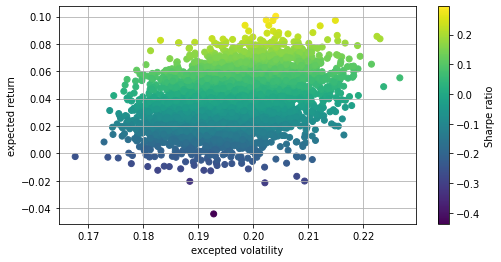

In [59]:
# Through a Monte Carlo simulation, a large number of random weight vectors are generated and the expected returns and variances of random combinations are recorded.
port_returns = []
port_variance = []
for p in range(4000):
    weights = np.random.random(noa)
    weights /=np.sum(weights)
    port_returns.append(np.sum(returns.mean()*252*weights))
    port_variance.append(np.sqrt(np.dot(weights.T, np.dot(returns.cov()*252, weights))))

port_returns = np.array(port_returns)
port_variance = np.array(port_variance)

#The risk-free rate was set at 4%
risk_free = 0.04
plt.figure(figsize = (8,4))
plt.scatter(port_variance, port_returns, c=(port_returns-risk_free)/port_variance, marker = 'o')
plt.grid(True)
plt.xlabel('excepted volatility')
plt.ylabel('expected return')
plt.colorbar(label = 'Sharpe ratio')
plt.show()

In [60]:
# Portfolio Optimization 1 -- SHARPE maximizes
# Create statistics function to record important portfolio statistics (returns, variance and # Sharpe ratio)
# By solving the constrained optimal problem, the optimal solution is obtained. Where the constraint is that the sum of the weights is 1.

def statistics(weights):
    weights = np.array(weights)
    port_returns = np.sum(returns.mean()*weights)*252
    port_variance = np.sqrt(np.dot(weights.T, np.dot(returns.cov()*252,weights)))
    return np.array([port_returns, port_variance, port_returns/port_variance])
#The derivation of portfolio optimization is a constrained optimization problem
import scipy.optimize as sco

#Minimize the negative of the Sharpe index
def min_sharpe(weights):
    return -statistics(weights)[2]

#The constraint is that the sum of all the parameters (weights) is 1. This can be expressed in the terms minimize function
cons = ({'type':'eq', 'fun':lambda x: np.sum(x)-1})

#We also limit the parameter values (weights) to between 0 and 1. These values are provided to the minimization function in the form of a tuple consisting of several tuples
bnds = tuple((0,1) for x in range(noa))

#The only input ignored in the optimization function call is the start argument list (the initial guess at the weight). Let's just use the average distribution.
opts = sco.minimize(min_sharpe, noa*[1./noa,], method = 'SLSQP', bounds = bnds, constraints = cons)
opts

     fun: -1.0631670185036584
     jac: array([ 1.59442425e-06,  1.17442892e+00,  6.51948810e-01,  5.71961418e-01,
        4.54854220e-02,  1.49405390e-01,  2.53327101e-01,  5.04147694e-01,
        8.09799790e-01,  1.03651714e+00,  7.15328440e-01,  6.94011062e-01,
        2.40698457e-04,  4.50056776e-01,  8.95425335e-01,  1.08397551e+00,
       -1.01193786e-04,  2.48458147e-01,  7.20918179e-05,  1.12294284e+00])
 message: 'Optimization terminated successfully'
    nfev: 254
     nit: 12
    njev: 12
  status: 0
 success: True
       x: array([1.89105075e-01, 5.26488575e-16, 3.91125934e-16, 5.15538133e-17,
       6.36968776e-17, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       2.37399675e-16, 0.00000000e+00, 0.00000000e+00, 1.10968092e-16,
       8.19225611e-02, 0.00000000e+00, 3.97360096e-17, 4.29073010e-16,
       4.18725214e-01, 0.00000000e+00, 3.10247150e-01, 1.30917412e-16])

In [61]:
# The optimal combination weight vector obtained is:
opts['x'].round(3)

array([0.189, 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.082, 0.   , 0.   , 0.   , 0.419, 0.   ,
       0.31 , 0.   ])

In [62]:
# The three statistics of the largest combination of SHARpe are:
#Expected return, expected volatility, optimal Sharpe index
statistics(opts['x']).round(3)

array([0.27 , 0.254, 1.063])

In [63]:
# Portfolio optimization 2 -- Minimum variance
# The optimal portfolio is selected by means of the minimum variance.

# But let's define a function that minimizes the variance
def min_variance(weights):
    return statistics(weights)[1]

optv = sco.minimize(min_variance, noa*[1./noa,],method = 'SLSQP', bounds = bnds, constraints = cons)
optv

     fun: 0.125399509868879
     jac: array([0.12539308, 0.15437329, 0.13697726, 0.12539728, 0.12541872,
       0.12534392, 0.14620494, 0.16079454, 0.1586436 , 0.12544857,
       0.15410297, 0.15560894, 0.12561048, 0.14048347, 0.12528692,
       0.12497845, 0.15167208, 0.14577114, 0.20072477, 0.18414867])
 message: 'Optimization terminated successfully'
    nfev: 273
     nit: 13
    njev: 13
  status: 0
 success: True
       x: array([5.47684825e-01, 0.00000000e+00, 6.07153217e-18, 6.67679210e-02,
       2.11856714e-01, 2.51979798e-02, 0.00000000e+00, 0.00000000e+00,
       2.91379334e-18, 2.60677862e-02, 1.60597447e-17, 1.32814766e-18,
       5.83105257e-02, 0.00000000e+00, 4.67399342e-02, 1.73743143e-02,
       0.00000000e+00, 4.24194100e-18, 2.77420231e-17, 0.00000000e+00])

In [64]:
# The optimal combination weight vector with the minimum variance and the statistical data of the combination are respectively:
optv['x'].round(3)

array([0.548, 0.   , 0.   , 0.067, 0.212, 0.025, 0.   , 0.   , 0.   ,
       0.026, 0.   , 0.   , 0.058, 0.   , 0.047, 0.017, 0.   , 0.   ,
       0.   , 0.   ])

In [65]:
# The expected yield, volatility and Sharpe index are obtained
statistics(optv['x']).round(3)

array([0.049, 0.125, 0.388])

In [66]:
# The effective frontier has the portfolio composition with the minimum variance under the given target rate of return.
# Two constraints are used in optimization, 1. Given target return rate, 2. Portfolio weight sum is 1.

def min_variance(weights):
    return statistics(weights)[1]

# One of the minimized constraints changes with the different target return levels (TARGEt_returns) loop.
target_returns = np.linspace(0.0,0.5,50)
target_variance = []
for tar in target_returns:
    cons = ({'type':'eq','fun':lambda x:statistics(x)[0]-tar},{'type':'eq','fun':lambda x:np.sum(x)-1})
    res = sco.minimize(min_variance, noa*[1./noa,],method = 'SLSQP', bounds = bnds, constraints = cons)
    target_variance.append(res['fun'])

target_variance = np.array(target_variance)

The following is a demonstration of the optimal results:
Cross: The formed curve is the effective frontier (the optimal portfolio under the target yield rate)

Red Star: Sharpe's largest portfolio

Yellow Star: The portfolio with the least variance

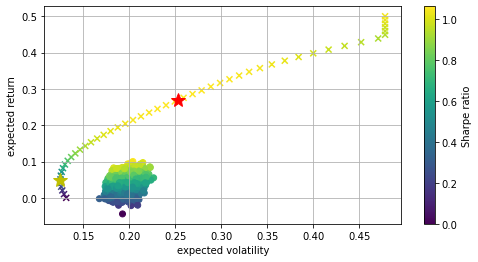

In [67]:
plt.figure(figsize = (8,4))
#Circle: A combination of randomly generated distributions in Monte Carlo
plt.scatter(port_variance, port_returns, c = port_returns/port_variance,marker = 'o')
#Cross: Effective leading edge
plt.scatter(target_variance,target_returns, c = target_returns/target_variance, marker = 'x')
#Red star: Marked with the highest SHARPE combination
plt.plot(statistics(opts['x'])[1], statistics(opts['x'])[0], 'r*', markersize = 15.0)
#Yellow star: Marks the minimum variance combination
plt.plot(statistics(optv['x'])[1], statistics(optv['x'])[0], 'y*', markersize = 15.0)
plt.grid(True)
plt.xlabel('expected volatility')
plt.ylabel('expected return')
plt.colorbar(label = 'Sharpe ratio')
plt.show()